In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import geopandas as gpd

In [2]:
dfr = pd.read_csv('Road Accident Data.csv')

In [3]:
dfr.head(3)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01/01/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70006,01/01/2021,Thursday,Give way or uncontrolled,T or staggered junction,Slight,51.493415,Daylight,Kensington and Chelsea,NaN,...,3,2,Metropolitan Police,Dry,Single carriageway,30,11:48,Urban,Fine no high winds,Car
2,200901CW10175,01/01/2021,Thursday,Auto traffic signal,Crossroads,Serious,51.523932,Darkness - lights lit,Westminster,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:30,Urban,Fine no high winds,Motorcycle over 500cc


In [4]:
dfr.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [5]:
dfr.dropna(subset=['Time'], inplace=True)

In [6]:
dfr.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302532
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                               0
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [7]:
dfr.shape

(307956, 21)

# Data Cleaning/Preprocessing

### Identify any defects (duplicates, inconsistensies, grammatical error, missing observations)

In [10]:
dfr.duplicated().sum()

1

In [11]:
dfr.drop_duplicates(inplace=True)
dfr.duplicated().sum()

0

In [12]:
for col in dfr.columns:
    print(f"Unique value counts for column '{col}':")
    print(dfr[col].value_counts(dropna=False))
    print("\n")  # Adding a space for better readability between columns

Unique value counts for column 'Accident_Index':
Accident_Index
2.01E+12         110286
2.01E+46              3
2.01E+112             2
2.01E+239             2
2.01E+282             2
                  ...  
200905CC01335         1
200905FF01336         1
200905FF02144         1
200906F020343         1
201060L239013         1
Name: count, Length: 197644, dtype: int64


Unique value counts for column 'Accident Date':
Accident Date
13/11/2021    692
11/02/2021    685
06/10/2021    680
04/12/2021    667
12/11/2021    659
             ... 
28/12/2022    181
27/12/2022    179
30/12/2022    171
25/12/2022    145
10/01/2022    123
Name: count, Length: 730, dtype: int64


Unique value counts for column 'Day_of_Week':
Day_of_Week
Friday       50529
Tuesday      46382
Wednesday    46378
Thursday     45646
Monday       43913
Saturday     41564
Sunday       33543
Name: count, dtype: int64


Unique value counts for column 'Junction_Control':
Junction_Control
Give way or uncontrolled               1

### Making changes to 'Accident Date' and Extracting month and year

In [14]:
dfr['Accident Date'] = pd.to_datetime(dfr['Accident Date'], format='%d/%m/%Y', errors='coerce')

In [15]:
dfr['Month'] = dfr['Accident Date'].dt.month

In [16]:
dfr['Year'] = dfr['Accident Date'].dt.year

In [17]:
print(dfr[['Accident Date', 'Month', 'Year']].head())

  Accident Date  Month  Year
0    2021-01-01      1  2021
1    2021-01-01      1  2021
2    2021-01-01      1  2021
3    2021-01-01      1  2021
4    2021-01-01      1  2021


### Making changes to 'Time'

In [19]:
dfr['Time'] = pd.to_datetime(dfr['Time'], format='%H:%M', errors='coerce')

In [20]:
dfr['Hour'] = dfr['Time'].dt.hour

In [21]:
print(dfr[['Time', 'Hour']].head())

                 Time  Hour
0 1900-01-01 15:11:00    15
1 1900-01-01 11:48:00    11
2 1900-01-01 17:30:00    17
3 1900-01-01 09:01:00     9
4 1900-01-01 05:29:00     5


### Correcting grammatical mistakes and others

In [23]:
# In 'Accident Severity', there are 'fetal' for various datapoints which is nonsense for a road accidents dataset (changing to fatal)
dfr['Accident_Severity'] = dfr['Accident_Severity'].replace('Fetal', 'Fatal')
print(dfr['Accident_Severity'].unique())

['Serious' 'Slight' 'Fatal']


In [24]:
# In junction control, auto traffic sigl should be auto traffic signal for consistency with the other value
if 'Junction_Control' in dfr.columns:
    dfr['Junction_Control'] = dfr['Junction_Control'].replace('Auto traffic sigl', 'Auto traffic signal')
print(dfr['Junction_Control'].unique())

['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Not at junction or within 20 metres'
 'Stop sign' 'Authorised person']


In [25]:
# Creating an column to use as index since 'Accident_Index' is unrealiable, duplicates can be seen above
dfr.reset_index(drop=True, inplace=True)
dfr['Index'] = dfr.index
dfr.set_index('Index', inplace=True)
dfr.head(2)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Month,Year,Hour
Index,,,,,,,,,,,,,,,,,,,,,
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,Dry,One way street,30,1900-01-01 15:11:00,Urban,Fine no high winds,Car,1,2021,15
1,200901BS70006,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Slight,51.493415,Daylight,Kensington and Chelsea,NaN,...,Dry,Single carriageway,30,1900-01-01 11:48:00,Urban,Fine no high winds,Car,1,2021,11


#### Handling Missing Values

In [27]:
# Replace NaN Values in 'Carriageway_Hazards' to No Hazards
dfr['Carriageway_Hazards'] = dfr['Carriageway_Hazards'].fillna('No Hazard')
print(dfr['Carriageway_Hazards'].unique())

['No Hazard' 'Pedestrian in carriageway - not injured'
 'Any animal in carriageway (except ridden horse)' 'Other object on road'
 'Previous accident' 'Vehicle load on road']


In [28]:
## Making changes and replaceing missing values in 'Road_Surface_Conditions'
# Replacing NaN Values in 'Road_Surface_Conditions'
def fill_road_surface_conditions(row): # Function to assign 'Road_Surface_Conditions' based on 'Weather_Conditions'
    if pd.isnull(row['Road_Surface_Conditions']):
        if row['Weather_Conditions'] in ['Fine no high winds', 'Fine high winds', 'Other']:
            return 'Dry'
        elif row['Weather_Conditions'] in ['Raining no high winds', 'Raining high winds']:
            return 'Wet or damp'
        elif row['Weather_Conditions'] in ['Snowing no high winds', 'Snowing high winds']:
            return 'Snow'
        else:
            return 'None'
    else:
        return row['Road_Surface_Conditions']

dfr['Road_Surface_Conditions'] = dfr.apply(fill_road_surface_conditions, axis=1)

dfr['Road_Surface_Conditions'] = dfr['Road_Surface_Conditions'].replace('Flood over 3cm. deep', 'Flood')
dfr['Road_Surface_Conditions'] = dfr['Road_Surface_Conditions'].replace('Wet or damp', 'Wet')
dfr['Road_Surface_Conditions'] = dfr['Road_Surface_Conditions'].replace('Frost or ice', 'Ice')
dfr = dfr[dfr['Road_Surface_Conditions'] != 'None'] # Dropping 'None' since missing values in both 'Weather_conditions' and 'Road_surface_condition'
print(dfr['Road_Surface_Conditions'].unique())

['Dry' 'Wet' 'Ice' 'Snow' 'Flood']


In [29]:
## Missing values in 'Road_type'
# Identifying most frequent road type based on area
most_frequent_road_type = dfr.groupby('Urban_or_Rural_Area')['Road_Type'].agg(lambda x: x.value_counts().idxmax())
print(most_frequent_road_type)

Urban_or_Rural_Area
Rural    Single carriageway
Urban    Single carriageway
Name: Road_Type, dtype: object


Since Single carriageway is the most popular type of road in both Rural and Urban areas, 'Speed Limit' will be used as a way to replace missing values

In [31]:
# Identifying the most frequent road type for different speed limit
most_frequent_by_speed = dfr.groupby('Speed_limit')['Road_Type'].agg(lambda x: x.value_counts().idxmax())
print(most_frequent_by_speed)

Speed_limit
10        One way street
15    Single carriageway
20    Single carriageway
30    Single carriageway
40    Single carriageway
50    Single carriageway
60    Single carriageway
70      Dual carriageway
Name: Road_Type, dtype: object


In [32]:
# Imputing missing values in 'Road_Type'
def replace_road_type_by_speed(row):
    if pd.isnull(row['Road_Type']):
        if row['Speed_limit'] <= 10:
            return 'One way street'
        elif 10 < row['Speed_limit'] <= 60:
            return 'Single carriageway'
        elif row['Speed_limit'] > 70:
            return 'Dual carriageway'
        else:
            return None 
    return row['Road_Type']

dfr['Road_Type'] = dfr.apply(replace_road_type_by_speed, axis=1)

dfr = dfr.dropna(subset=['Road_Type']) # Drop rows where NaN persists
print(dfr['Road_Type'].value_counts()) 

Road_Type
Single carriageway    231853
Dual carriageway       45454
Roundabout             20895
One way street          6185
Slip road               3232
Name: count, dtype: int64


In [33]:
# Replacing missing values in weather conditions based on 'Road_Surface_type'
def replace_weather_conditions(row):
    if pd.isnull(row['Weather_Conditions']):
        if row['Road_Surface_Conditions'] == 'Dry':
            return 'Fine'
        elif row['Road_Surface_Conditions'] in ['Wet', 'Flood']:
            return 'Raining'
        elif row['Road_Surface_Conditions'] in ['Ice', 'Snow']:
            return 'Snowing'
    return row['Weather_Conditions'] 

dfr['Weather_Conditions'] = dfr.apply(replace_weather_conditions, axis=1)
print(dfr['Weather_Conditions'].value_counts())  

Weather_Conditions
Fine no high winds       244436
Raining no high winds     34865
Other                      8797
Snowing no high winds      4839
Fine                       4700
Raining + high winds       3523
Fine + high winds          3148
Fog or mist                1689
Raining                     871
Snowing + high winds        538
Snowing                     213
Name: count, dtype: int64


In [34]:
# Replacing some weather conditions for simplicity
dfr['Weather_Conditions'] = dfr['Weather_Conditions'].replace({
    'Fine no high winds': 'Fine',
    'Raining no high winds': 'Raining',
    'Snowing no high winds': 'Snowing',
    'Fine + high winds': 'High Winds',
    'Fog or mist': 'Fog',
    'Raining + high winds': 'Rain and High winds',
    'Snowing + high winds': 'Snow and High winds'
})
print(dfr['Weather_Conditions'].value_counts())

Weather_Conditions
Fine                   249136
Raining                 35736
Other                    8797
Snowing                  5052
Rain and High winds      3523
High Winds               3148
Fog                      1689
Snow and High winds       538
Name: count, dtype: int64


In [35]:
dfr.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
Month                         0
Year                          0
Hour                          0
dtype: int64

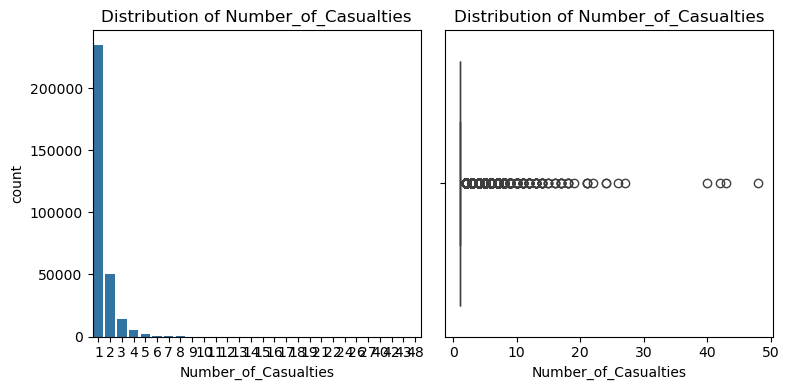

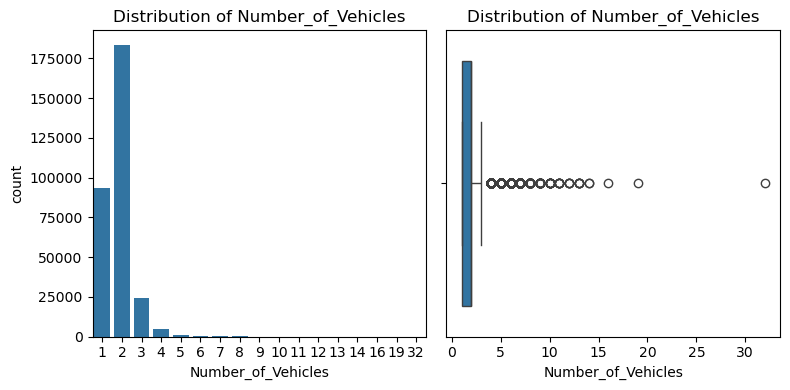

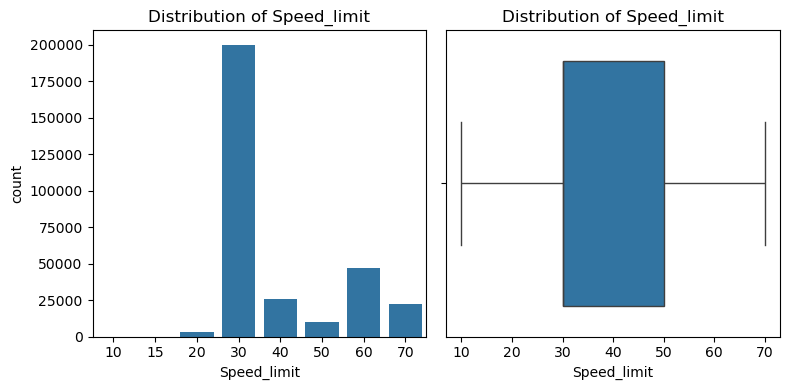

In [36]:
discrete_variables = ['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']

for v in discrete_variables:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    sns.countplot(x=dfr[v], ax=axes[0])
    axes[0].set_title(f'Distribution of {v}')
    sns.boxplot(x=dfr[v], ax=axes[1])
    axes[1].set_title(f'Distribution of {v}')
    plt.tight_layout()
    plt.show()

Outliers in casualties are removed since road accidents by car is very unlikely to lead to that many casualties. Will check online if anything of this magnitude actually happened. Those should have made headlines if they actually happened.

### Number_of_Casualties outliers

Dropping datapoints where Number_of_Casualties more than 20 since no records has been found online (this value may have shown up when the file was downloaded or converted or even human error when recording the data)

In [40]:
dfr = dfr[dfr['Number_of_Casualties'] < 20]
dfr['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     234818
2      50028
3      14324
4       5347
5       1893
6        712
7        242
8        102
9         44
10        34
12        15
11        14
13        10
14         8
17         5
18         4
15         3
16         3
19         1
Name: count, dtype: int64

### Number_of_Vehicle outlier
Checked online and nothing recorded where 32 vehicles were involved in a traffic accident (either not documented or error when recording info

In [42]:
dfr = dfr[dfr['Number_of_Vehicles'] < 20]
dfr['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2     183378
1      93234
3      24204
4       5068
5       1125
6        346
7        126
8         63
9         31
10        12
11         6
13         5
12         4
14         2
16         1
19         1
Name: count, dtype: int64

## Feature Engineering
In this section, the aim is to check if any of the variables require standardisation/normalisation or any other transformation, we will also attempt to create some new features that may be useful in the analysis or modelling (Dummy variables will be created for some variables)

### New Variable: 'Rush_Hour'

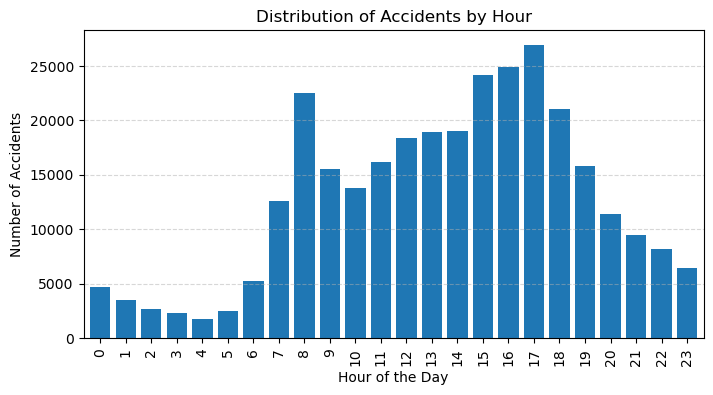

In [45]:
plt.figure(figsize=(8, 4))
dfr['Hour'].value_counts(sort=False).sort_index().plot(kind='bar', width=0.8)
plt.title('Distribution of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In the above diagram, peaks can clearly be observed at 8:00 and 17:00. For consistency with UK standards we will consider rush hours (7am to 10am and 4pm to 7pm) to create the new variable 'Rush_hours'

In [47]:
rush_hours = (dfr['Hour'] >= 7) & (dfr['Hour'] <= 10) | (dfr['Hour'] >= 16) & (dfr['Hour'] <= 19)
dfr['Rush_Hour'] = rush_hours.astype(int)
print(dfr[['Hour', 'Rush_Hour']].head(3))

       Hour  Rush_Hour
Index                 
0        15          0
1        11          0
2        17          1


### New Variable: 'Visibility' (0-No Light(Darkness) and 1-Daylight/Lights on)

In [49]:
dfr['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       227016
Darkness - lights lit           60038
Darkness - no lighting          16513
Darkness - lighting unknown      2898
Darkness - lights unlit          1141
Name: count, dtype: int64

In [50]:
lighting_conditions = (dfr['Light_Conditions'] == 'Daylight') | (dfr['Light_Conditions'] == 'Darkness - lights lit')
dfr['Visibility'] = lighting_conditions.astype(int)
print(dfr[['Light_Conditions', 'Visibility']].tail(7))

              Light_Conditions  Visibility
Index                                     
307948  Darkness - no lighting           0
307949                Daylight           1
307950   Darkness - lights lit           1
307951   Darkness - lights lit           1
307952                Daylight           1
307953                Daylight           1
307954                Daylight           1


### New Variable: 'Vehicle' (Grouping the different vehicle type into categories)

In [52]:
vehicle_mapping = {
    'Car': 'Car',
    'Van / Goods 3.5 tonnes mgw or under': 'Goods Vehicles',
    'Motorcycle over 500cc': 'Motorcycles',
    'Bus or coach (17 or more pass seats)': 'Public Transport',
    'Motorcycle 125cc and under': 'Motorcycles',
    'Goods 7.5 tonnes mgw and over': 'Goods Vehicles',
    'Taxi/Private hire car': 'Taxis and Private Hire',
    'Motorcycle 50cc and under': 'Motorcycles',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycles',
    'Other vehicle': 'Special Purpose Vehicles',
    'Goods over 3.5t. and under 7.5t': 'Goods Vehicles',
    'Minibus (8 - 16 passenger seats)': 'Public Transport',
    'Agricultural vehicle': 'Special Purpose Vehicles',
    'Pedal cycle': 'Cycles',
    'Ridden horse': 'Special Purpose Vehicles'
}
dfr['Vehicle'] = dfr['Vehicle_Type'].map(vehicle_mapping)
print(dfr['Vehicle'].value_counts())

Vehicle
Car                         239508
Motorcycles                  25041
Goods Vehicles               24691
Public Transport              9500
Taxis and Private Hire        5537
Special Purpose Vehicles      3263
Cycles                          66
Name: count, dtype: int64


In [53]:
dfr.shape

(307606, 27)

# Analysis and Statistics

#### Descriptive Stastistics

In [93]:
# Used ChatGPT prompt 'Give me the percentage of each accident severity for each of the variables listed below'
# independent_variables = Year, Month, Day_of_Week, Hour , Junction_Control, Local_Authority_(District), Road_Surface_Conditions, Road_Type, Speed_limit, Urban_or_Rural_Area, Vehicle
def descriptive_stats(dfr, group_col, severity_col):
    descriptive_data = dfr.groupby(group_col)[severity_col].value_counts(normalize=True).unstack(fill_value=0) * 100
    count_data = dfr[group_col].value_counts().rename("Count")
    combined_stats = descriptive_data.join(count_data)
    return combined_stats

severity_column = 'Accident_Severity' 
independent_variables = ['Year', 'Month', 'Day_of_Week', 'Hour' , 'Junction_Control', 'Local_Authority_(District)', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Vehicle']  

for variable in independent_variables:
    print(f"\nDescriptive statistics for {variable}:")
    stats = descriptive_stats(dfr, variable, severity_column)
    print(stats)


Descriptive statistics for Year:
         Fatal    Serious    Slight   Count
Year                                       
2021  1.469112  13.435029  85.09586  163364
2022  1.071810  13.008000  85.92019  144242

Descriptive statistics for Month:
          Fatal    Serious     Slight  Count
Month                                       
1      1.306154  12.303542  86.390304  23351
2      1.725243  12.264324  86.010434  21852
3      1.443194  13.090709  85.466097  25499
4      1.289309  14.252655  84.458035  24199
5      1.529578  14.198310  84.272112  26151
6      1.155832  14.038303  84.805865  26734
7      1.162359  13.610368  85.227273  26928
8      1.409114  13.710405  84.880480  25477
9      1.216408  14.267535  84.516057  26718
10     1.147032  13.242041  85.610927  28334
11     1.028977  12.103379  86.867644  29058
12     1.089895  11.439605  87.470500  23305

Descriptive statistics for Day_of_Week:
                Fatal    Serious     Slight  Count
Day_of_Week                      

#### Temporal Analysis

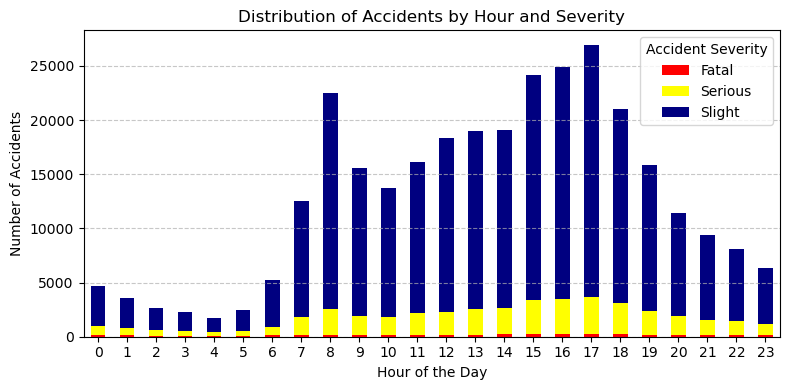

In [58]:
hour_severity_counts = dfr.pivot_table(
    index='Hour',
    columns='Accident_Severity',
    aggfunc='size',
)

hour_severity_counts.plot(
    kind='bar',
    figsize=(8, 4),
    stacked=True,
    color={'Fatal': 'red', 'Serious': 'yellow', 'Slight': 'navy'}
)
    
plt.title('Distribution of Accidents by Hour and Severity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=360)
plt.legend(title='Accident Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\sajja\AppData\Local\Temp\ipykernel_24180\3246040930.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_severity_counts = dfr.pivot_table(


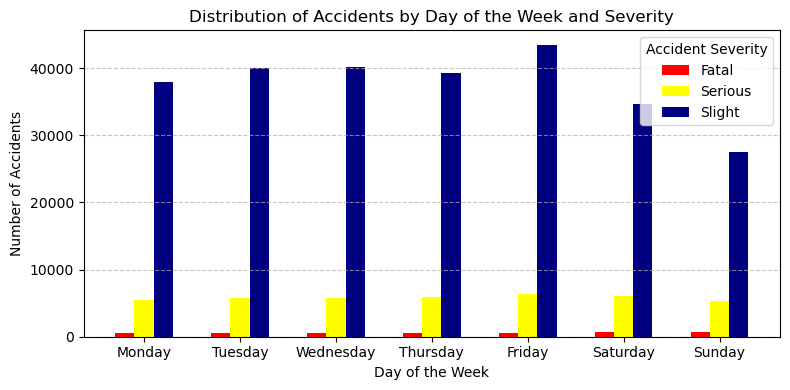

In [112]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dfr['Day_of_Week'] = pd.Categorical(dfr['Day_of_Week'], categories=day_order, ordered=True) 
day_severity_counts = dfr.pivot_table(
    index='Day_of_Week',
    columns='Accident_Severity',
    aggfunc='size',
)
colors = {'Fatal': 'red', 'Serious': 'yellow', 'Slight': 'navy'}
bar_width = 0.2  
x = np.arange(len(day_severity_counts.index))  

plt.figure(figsize=(8, 4))
for i, severity in enumerate(day_severity_counts.columns):
    plt.bar(
        x + i * bar_width,
        day_severity_counts[severity],
        width=bar_width,
        label=severity,
        color=colors[severity]
    )

plt.title('Distribution of Accidents by Day of the Week and Severity')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(x + bar_width * (len(day_severity_counts.columns) - 1) / 2, day_severity_counts.index)
plt.legend(title='Accident Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [61]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
dfr['Month'] = dfr['Month'].replace(month_mapping)
dfr['Month']

Index
0          January
1          January
2          January
3          January
4          January
            ...   
307950    December
307951    December
307952    December
307953    December
307954    December
Name: Month, Length: 307606, dtype: object

C:\Users\sajja\AppData\Local\Temp\ipykernel_24180\3409148480.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  month_severity_counts = dfr.pivot_table(


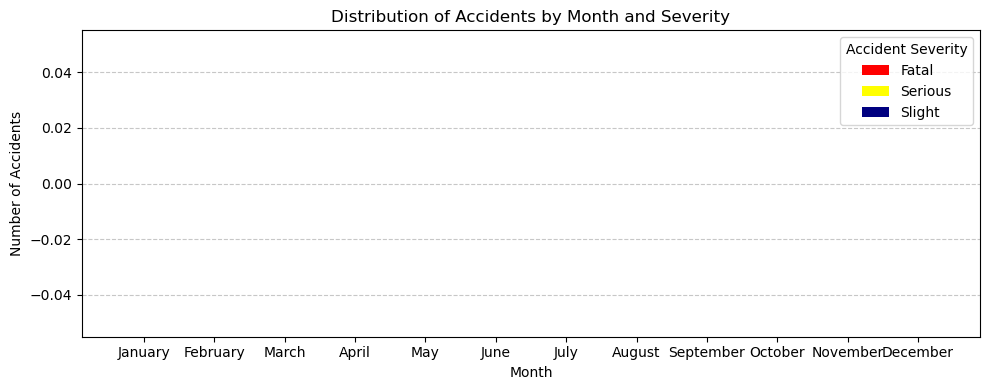

In [114]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
dfr['Month'] = pd.Categorical(dfr['Month'], categories=month_order, ordered=True)

month_severity_counts = dfr.pivot_table(
    index='Month',
    columns='Accident_Severity',
    aggfunc='size',
    fill_value=0
)

bar_width = 0.2  
x = np.arange(len(month_severity_counts.index))  
plt.figure(figsize=(10, 4))

for i, severity in enumerate(month_severity_counts.columns):
    plt.bar(
        x + i * bar_width,
        month_severity_counts[severity],
        width=bar_width,
        label=severity,
        color=colors[severity]
    )

plt.title('Distribution of Accidents by Month and Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(x + bar_width * (len(month_severity_counts.columns) - 1) / 2, month_severity_counts.index)
plt.legend(title='Accident Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Monthdistribution.jpg')
plt.show()

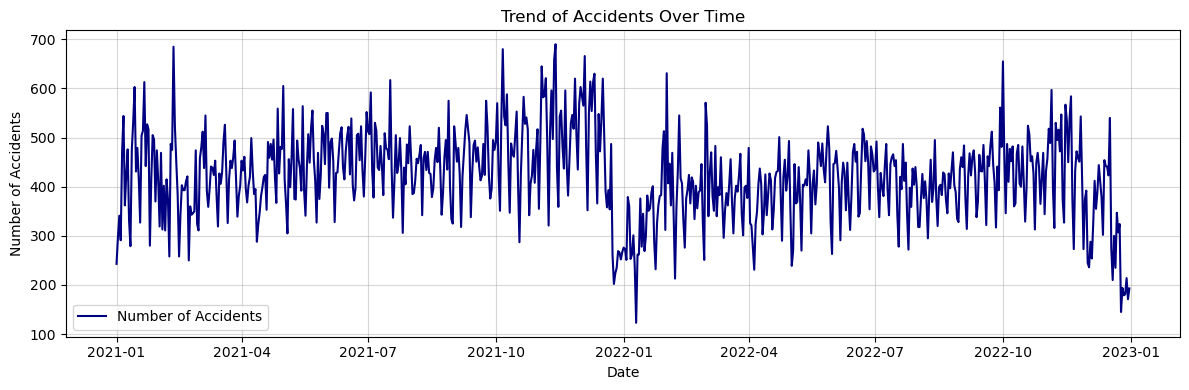

In [63]:
accidents_per_date = dfr.groupby('Accident Date').size().reset_index(name='Accident_Count')

plt.figure(figsize=(12, 4))
plt.plot(
    accidents_per_date['Accident Date'],
    accidents_per_date['Accident_Count'],
    label='Number of Accidents',
    color='navy'
)

plt.title('Trend of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

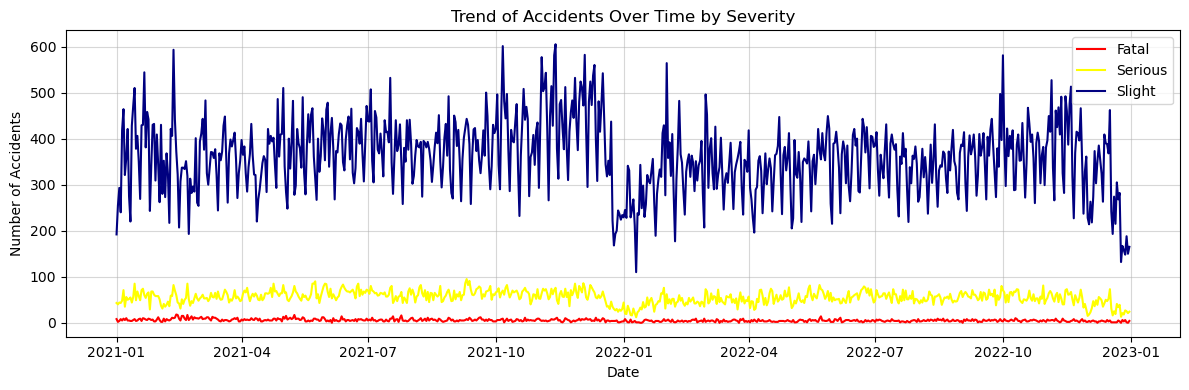

In [64]:
accidents_per_date_severity = dfr.groupby(['Accident Date', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_pivot = accidents_per_date_severity.pivot(index='Accident Date', columns='Accident_Severity', values='Accident_Count').fillna(0)
plt.figure(figsize=(12, 4))
for severity in accidents_pivot.columns:
    plt.plot(accidents_pivot.index, accidents_pivot[severity], color=colors[severity], label=severity)
plt.title('Trend of Accidents Over Time by Severity')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

This graph does help us see that the number of fatal and serious accidents are mostly constant over the period of time, if more wwords were allowed, we could have split this diagram into three for each levels of severity and add a trend line for beeter observation, we will stick to the first diagram as a way to observe number of accidents daily and we can also see the changes between the two years

## Spatial Analysis

In [99]:
uk_map = gpd.read_file('boundaries_gb.shp') # shape file

In [101]:
merged_data = pd.merge(
    dfr,
    uk_map[['geo_label', 'geometry']],  
    left_on='Local_Authority_(District)', 
    right_on='geo_label', 
    how='inner'
)

In [103]:
merged_geo = gpd.GeoDataFrame(merged_data, geometry='geometry')

In [105]:
merged_geo.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Weather_Conditions,Vehicle_Type,Month,Year,Hour,Rush_Hour,Visibility,Vehicle,geo_label,geometry
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,No Hazard,...,Fine,Car,1,2021,15,0,1,Car,Kensington and Chelsea,"POLYGON ((522978.594 182758.641, 523850.313 18..."
1,200901BS70006,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Slight,51.493415,Daylight,Kensington and Chelsea,No Hazard,...,Fine,Car,1,2021,11,0,1,Car,Kensington and Chelsea,"POLYGON ((522978.594 182758.641, 523850.313 18..."
2,200901EK76923,2021-01-01,Thursday,Data missing or out of range,Not at junction or within 20 metres,Serious,51.543017,Daylight,Camden,No Hazard,...,Fine,Car,1,2021,5,0,1,Car,Camden,"POLYGON ((523954.478 185541.508, 526830.307 18..."
3,200901FH10012,2021-01-01,Thursday,Auto traffic signal,More than 4 arms (not roundabout),Slight,51.503254,Darkness - lights lit,Hammersmith and Fulham,No Hazard,...,Fine,Motorcycle 50cc and under,1,2021,2,0,1,Motorcycles,Hammersmith and Fulham,"POLYGON ((521731.094 183000.719, 522978.594 18..."
4,200901GD76755,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Slight,51.563718,Darkness - lights lit,Hackney,No Hazard,...,Fine,Car,1,2021,21,0,1,Car,Hackney,"POLYGON ((531479.875 186794.719, 534444.001 18..."


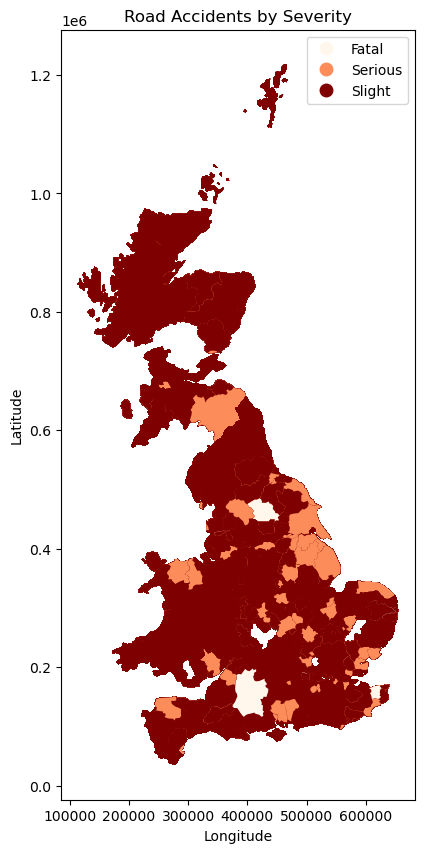

In [107]:
merged_geo.plot(figsize=(10, 10), column='Accident_Severity', legend=True, cmap='OrRd')

plt.title("Road Accidents by Severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

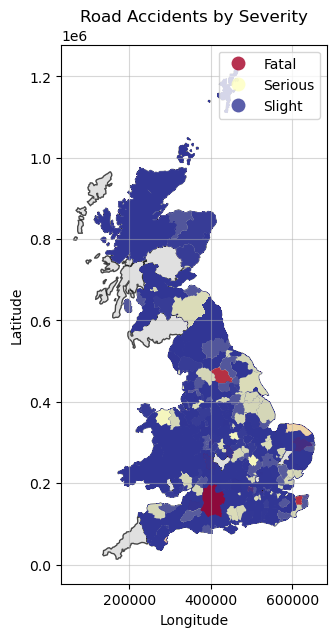

In [860]:
fig, ax = plt.subplots(figsize=(7, 7))

uk_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)

merged_geo.plot(
    ax=ax,
    column='Accident_Severity',  
    markersize=5,
    cmap='RdYlBu', 
    legend=True,
    alpha=0.8
)

plt.title("Road Accidents by Severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.5)

plt.show()

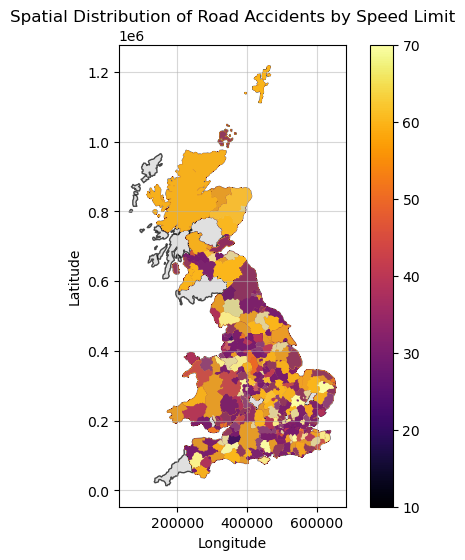

In [876]:
fig, ax = plt.subplots(figsize=(6, 6))

uk_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)

merged_geo.plot(
    ax=ax,
    column='Speed_limit', 
    markersize=5,
    cmap='inferno',
    legend=True,
    alpha=0.8
)

plt.title("Spatial Distribution of Road Accidents by Speed Limit")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.5)
plt.show()

#### Geographical representation of Fatal Accidents

In [75]:
fatal_accidents = merged_geo[merged_geo['Accident_Severity'] == 'Fatal']

fatal_counts = fatal_accidents.groupby('Local_Authority_(District)').agg(
    Fatal_Accident_Count=('Accident_Index', 'count'),  
    geo_label=('geo_label', 'first'),                  
    geometry=('geometry', 'first'),                
).reset_index()

fatal_counts.head()
fatal_counts_geo = gpd.GeoDataFrame(fatal_counts, geometry='geometry')
fatal_counts_geo.head()

,Local_Authority_(District),Fatal_Accident_Count,geo_label,geometry
0,Aberdeen City,3,Aberdeen City,"POLYGON ((394935.3 799431.1, 392464.8 803060.9..."
1,Aberdeenshire,21,Aberdeenshire,"POLYGON ((396415.8 813464, 392357.1 815197.7, ..."
2,Adur,7,Adur,"MULTIPOLYGON (((514992.999 108050.297, 515159...."
3,Allerdale,8,Allerdale,"POLYGON ((328392.296 559534.888, 330953.219 55..."
4,Amber Valley,8,Amber Valley,"POLYGON ((433854.813 359756, 437083.094 356417..."


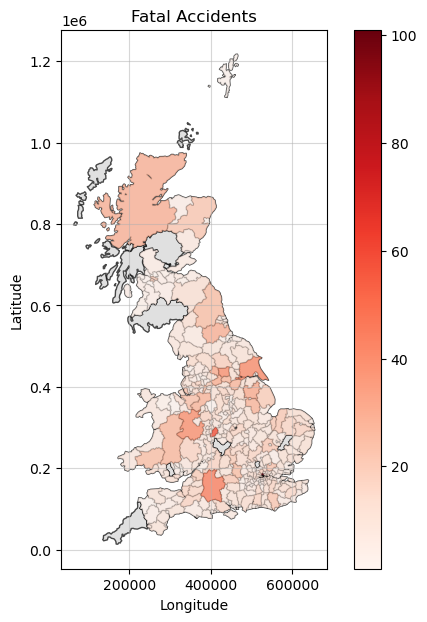

In [864]:
fig, ax = plt.subplots(figsize=(7, 7))

uk_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)

fatal_counts_geo.plot(
    ax=ax,
    column='Fatal_Accident_Count',  
    markersize=5,
    cmap='Reds', 
    legend=True,
    alpha=0.8
)

plt.title("Fatal Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.5)
plt.show()

#### Geographical Representation of Serious Accidents

In [78]:
serious_accidents = merged_geo[merged_geo['Accident_Severity'] == 'Serious']

serious_counts = serious_accidents.groupby('Local_Authority_(District)').agg(
    Serious_Accident_Count=('Accident_Index', 'count'),  
    geo_label=('geo_label', 'first'),                  
    geometry=('geometry', 'first'),                
).reset_index()
serious_counts_geo = gpd.GeoDataFrame(serious_counts, geometry='geometry')
serious_counts_geo.head()

,Local_Authority_(District),Serious_Accident_Count,geo_label,geometry
0,Aberdeen City,72,Aberdeen City,"POLYGON ((394935.3 799431.1, 392464.8 803060.9..."
1,Aberdeenshire,182,Aberdeenshire,"POLYGON ((396415.8 813464, 392357.1 815197.7, ..."
2,Adur,48,Adur,"MULTIPOLYGON (((514992.999 108050.297, 515159...."
3,Allerdale,64,Allerdale,"POLYGON ((328392.296 559534.888, 330953.219 55..."
4,Amber Valley,75,Amber Valley,"POLYGON ((433854.813 359756, 437083.094 356417..."


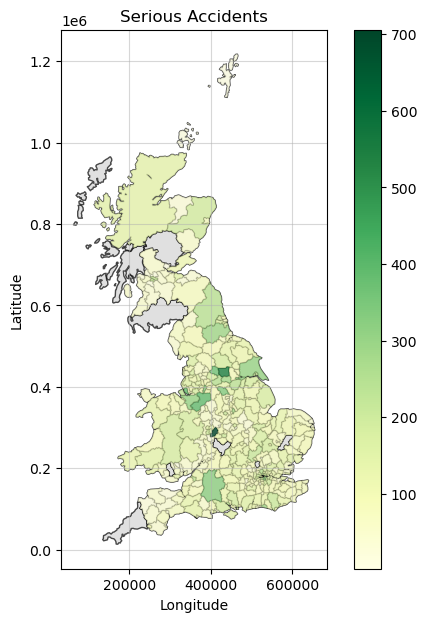

In [862]:
# Plot
fig, ax = plt.subplots(figsize=(7, 7))
uk_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
serious_counts_geo.plot(
    ax=ax,
    column='Serious_Accident_Count',  
    markersize=5,
    cmap='YlGn', 
    legend=True,
    alpha=0.8
)
plt.title("Serious Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.5)
plt.show()

#### Geographical Representation of Slight Accidents

In [81]:
slight_accidents = merged_geo[merged_geo['Accident_Severity'] == 'Slight']

slight_counts = slight_accidents.groupby('Local_Authority_(District)').agg(
    Slight_Accident_Count=('Accident_Index', 'count'),  
    geo_label=('geo_label', 'first'),                  
    geometry=('geometry', 'first'),                
).reset_index()
slight_counts_geo = gpd.GeoDataFrame(slight_counts, geometry='geometry')
slight_counts_geo.head()

,Local_Authority_(District),Slight_Accident_Count,geo_label,geometry
0,Aberdeen City,364,Aberdeen City,"POLYGON ((394935.3 799431.1, 392464.8 803060.9..."
1,Aberdeenshire,478,Aberdeenshire,"POLYGON ((396415.8 813464, 392357.1 815197.7, ..."
2,Adur,229,Adur,"MULTIPOLYGON (((514992.999 108050.297, 515159...."
3,Allerdale,451,Allerdale,"POLYGON ((328392.296 559534.888, 330953.219 55..."
4,Amber Valley,546,Amber Valley,"POLYGON ((433854.813 359756, 437083.094 356417..."


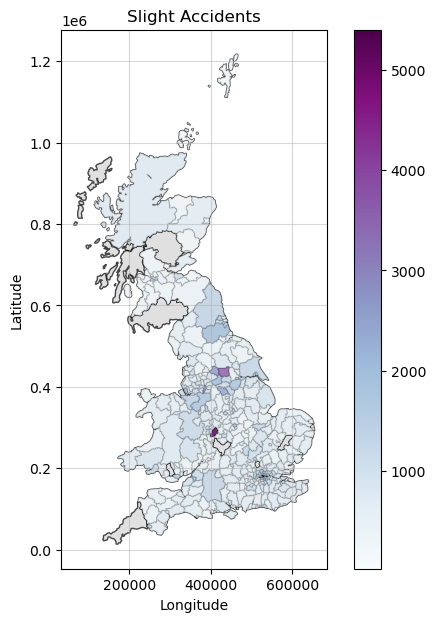

In [82]:
# Plot
fig, ax = plt.subplots(figsize=(7, 7))
uk_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
slight_counts_geo.plot(
    ax=ax,
    column='Slight_Accident_Count',  
    markersize=5,
    cmap='BuPu', 
    legend=True,
    alpha=0.8
)

# Add title and labels
plt.title("Slight Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.5)
plt.savefig('Slight Road Accidents.jpg')
plt.show()

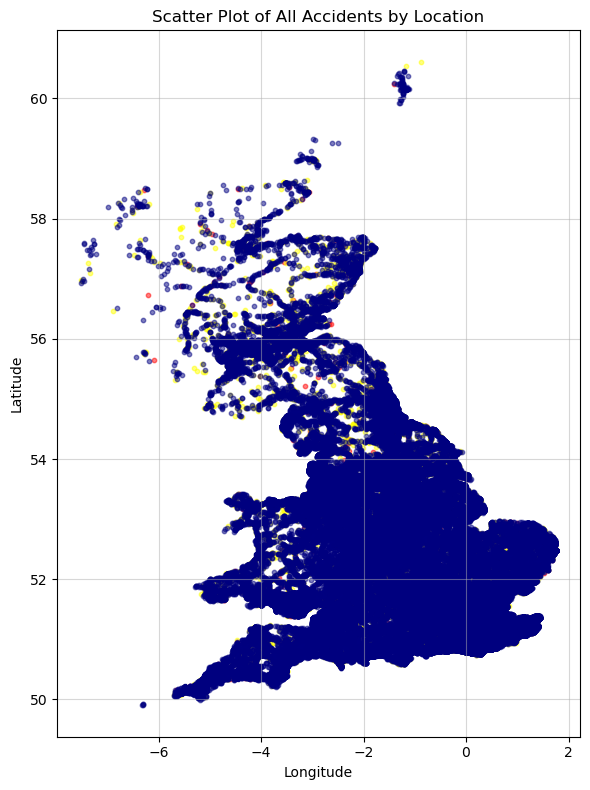

In [874]:
severity_colors = {'Fatal': 'red', 'Serious': 'yellow', 'Slight': 'navy'}
plt.figure(figsize=(6, 8))
for severity, color in severity_colors.items():
    subset = dfr[dfr['Accident_Severity'] == severity] 
    plt.scatter(
        subset['Longitude'],
        subset['Latitude'],
        alpha=0.5,
        s=10,
        label=severity,
        c=color
    )

plt.title('Scatter Plot of All Accidents by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


## Environmental Analysis

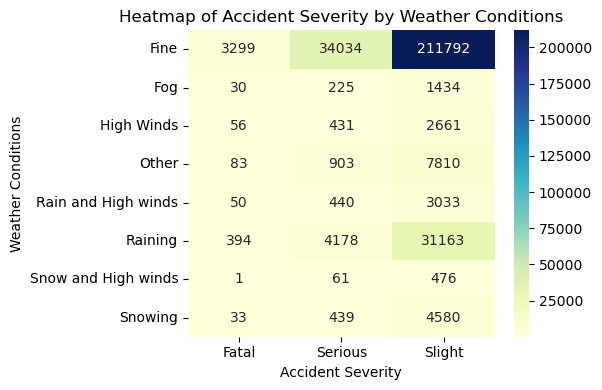

In [152]:
weather_counts = dfr.pivot_table(
    index='Weather_Conditions',
    columns='Accident_Severity',
    aggfunc='size',
)

plt.figure(figsize=(6, 4))
sns.heatmap(weather_counts, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

plt.title('Heatmap of Accident Severity by Weather Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Weather Conditions')
plt.tight_layout()
plt.show()

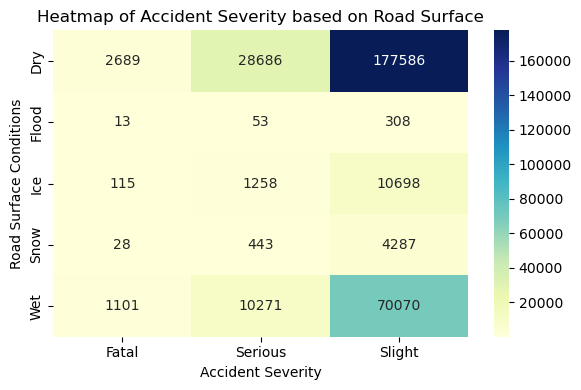

In [150]:
road_surface = dfr.pivot_table(
    index='Road_Surface_Conditions',
    columns='Accident_Severity',
    aggfunc='size',
)

plt.figure(figsize=(6, 4))
sns.heatmap(road_surface, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Accident Severity based on Road Surface')
plt.xlabel('Accident Severity')
plt.ylabel('Road Surface Conditions')
plt.tight_layout()
plt.savefig('HeatmapRoadSurf.jpg')
plt.show()

## Modelling

Since logistic regression is among the ml techniques used, some categorical variables will see their values merged to aoivd overfitting and improve model interpretability. For instance, a new variable is created for weather conditions.

In [165]:
weather_merge = {
    'Fine': 'Good Weather',
    'Fog': 'Adverse Weather',
    'High Winds': 'Moderate Weather',
    'Other': 'Moderate Weather',
    'Rain and High winds': 'Moderate Weather',
    'Raining': 'Adverse Weather',
    'Snow and High winds': 'Adverse Weather',
    'Snowing': 'Adverse Weather'
}

dfr['Weather'] = dfr['Weather_Conditions'].map(weather_merge)
print(dfr[['Weather_Conditions', 'Weather']].head(5))

      Weather_Conditions          Weather
Index                                    
0                   Fine     Good Weather
1                   Fine     Good Weather
2                   Fine     Good Weather
3                Raining  Adverse Weather
4                   Fine     Good Weather


For road surface conditions, we consider wet, dry and slippery conditions (this prevent rare cases such as flood from causing overfitting)

In [168]:
roadsurface_merge = {
    'Dry': 'Dry Conditions',
    'Flood': 'Wet Conditions',
    'Ice': 'Slippery Conditions',
    'Snow': 'Slippery Conditions',
    'Wet': 'Wet Conditions'
}

dfr['Road Conditions'] = dfr['Road_Surface_Conditions'].map(roadsurface_merge)
print(dfr[['Road_Surface_Conditions', 'Road Conditions']].head(5))

      Road_Surface_Conditions Road Conditions
Index                                        
0                         Dry  Dry Conditions
1                         Dry  Dry Conditions
2                         Dry  Dry Conditions
3                         Wet  Wet Conditions
4                         Dry  Dry Conditions


In [696]:
dfr['Urban_Rural'] = dfr['Urban_or_Rural_Area'].map({'Urban': 1, 'Rural': 0})
print(dfr[['Urban_or_Rural_Area', 'Urban_Rural']].head())

      Urban_or_Rural_Area  Urban_Rural
Index                                 
0                   Urban            1
1                   Urban            1
2                   Urban            1
3                   Urban            1
4                   Urban            1


#### Correlation Matrix Heatmap

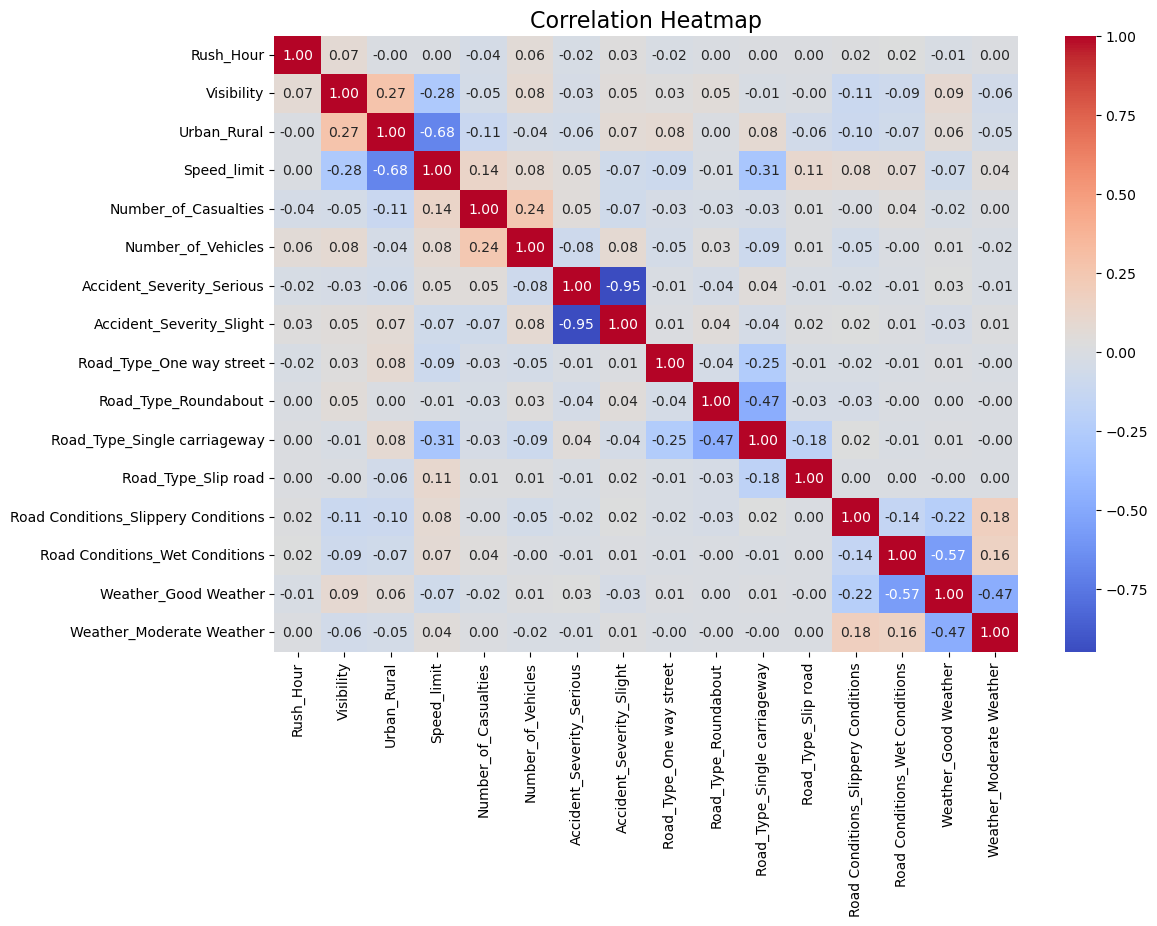

In [791]:
correlation_data = dfr[['Accident_Severity', 'Rush_Hour', 'Visibility', 'Urban_Rural', 
                        'Speed_limit', 'Number_of_Casualties', 'Road_Type', 
                        'Road Conditions', 'Weather', 'Number_of_Vehicles']]

correlation_data = pd.get_dummies(correlation_data, drop_first=True) # dummy var for categorical features

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.savefig('Correlation Heatmap Var in modelling.jpg')
plt.show()

PCA was considered for feature selection but no high multicollinearity has been observed. Features are selected based on previous research and domain knowledge.

80:20 train:test split and stratified 10-fold crossvalidation

In [668]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import shap

In [738]:
features = ['Speed_limit', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Type', 'Urban_Rural', 'Rush_Hour', 'Visibility', 'Weather', 'Road Conditions', 'Vehicle']
target = 'Accident_Severity'

In [849]:
X = dfr[features]
y = dfr[target]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

numerical_features = ['Speed_limit', 'Number_of_Casualties', 'Number_of_Vehicles']
categorical_features = ['Road_Type', 'Weather', 'Road Conditions', 'Vehicle']

# Using ColunTransformer since different types of features requiring different transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardizing numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encoding categorical features
    ]
)
X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

In [743]:
logmodel =  LogisticRegression(max_iter=1000, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(logmodel, X_train, y_train, cv=cv, scoring='accuracy')
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

In [744]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Used 'weighted' since multiclass
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  

print(f"Cross-validation Accuracy: {cv_scores.mean()}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Cross-validation Accuracy: 0.854773167125785
Accuracy: 0.8546861285393843
Precision: 0.7586570662129938
Recall: 0.8546861285393843
F1-Score: 0.7880024123374996


### Random Forest

In [707]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)
rfcv_scores = cross_val_score(rfmodel, X_train, y_train, cv=cv, scoring='accuracy')
rfmodel.fit(X_train, y_train)
yrf_pred = rfmodel.predict(X_test)

In [708]:
accuracy_rf = accuracy_score(y_test, yrf_pred)
precision_rf = precision_score(y_test, yrf_pred, average='weighted', zero_division=0)  # Added 'zero_division(np.nan)' since some class labels are underepresented
recall_rf = recall_score(y_test, yrf_pred, average='weighted', zero_division=0)  
f1_rf = f1_score(y_test, yrf_pred, average='weighted',zero_division=0)

print(f"Cross-validation Accuracy: {rfcv_scores.mean()}")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")

Cross-validation Accuracy: 0.8528713756427508
Accuracy: 0.8529956763434219
Precision: 0.7671063573870485
Recall: 0.8529956763434219
F1-Score: 0.7891357752138055


C:\Users\sajja\AppData\Local\Temp\ipykernel_37936\3175020719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.values,


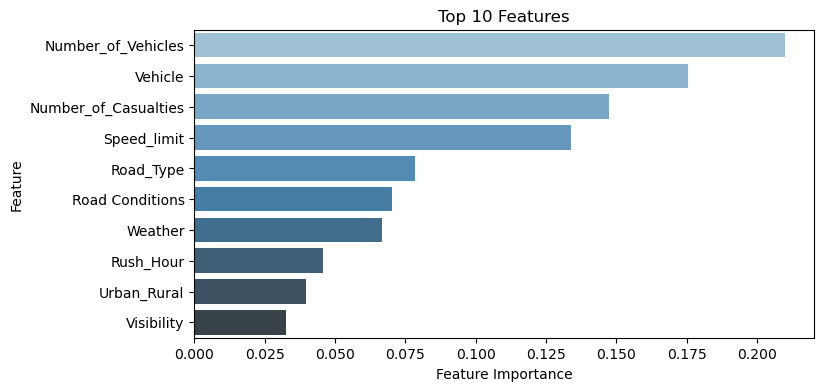

In [841]:
feature_importances = pd.Series(rfmodel.feature_importances_, index=X.columns)
top_n = 20
sorted_feature_importances = feature_importances.sort_values(ascending=False)[:top_n]

plt.figure(figsize=(8, 4))
sns.barplot(x=sorted_feature_importances.values, 
            y=sorted_feature_importances.index, 
            orient="h", 
            palette="Blues_d", 
            hue=None, legend=False)  # Fix the warning

plt.title("Top 10 Features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.savefig("SmallFeatureImportance55", bbox_inches = 'tight')
plt.show()

### Light Gradient Boosting (L-GBM)

In [774]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=cv, scoring='accuracy')
lgbm_model.fit(X_train, y_train)
ylgbm_pred = lgbm_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 221475, number of used features: 17
[LightGBM] [Info] Start training from score -4.356154
[LightGBM] [Info] Start training from score -2.022313
[LightGBM] [Info] Start training from score -0.156860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 221475, number of used features: 17
[LightGBM] [Info] Start training from score -4.356154
[LightGBM] [Info] Start training from score -2.022313
[LightGBM] [Info] Start tr

In [775]:
accuracy_lgbm = accuracy_score(y_test, ylgbm_pred)
precision_lgbm = precision_score(y_test, ylgbm_pred, average='weighted', zero_division=0) 
recall_lgbm = recall_score(y_test, ylgbm_pred, average='weighted', zero_division=0)  
f1_lgbm = f1_score(y_test, ylgbm_pred, average='weighted', zero_division=0)

print(f"Cross-validation Accuracy: {lgbm_cv_scores.mean()}")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1-Score: {f1_lgbm}")

Cross-validation Accuracy: 0.8548097396070379
Accuracy: 0.8547186372354605
Precision: 0.7803966783642364
Recall: 0.8547186372354605
F1-Score: 0.7886192029822987


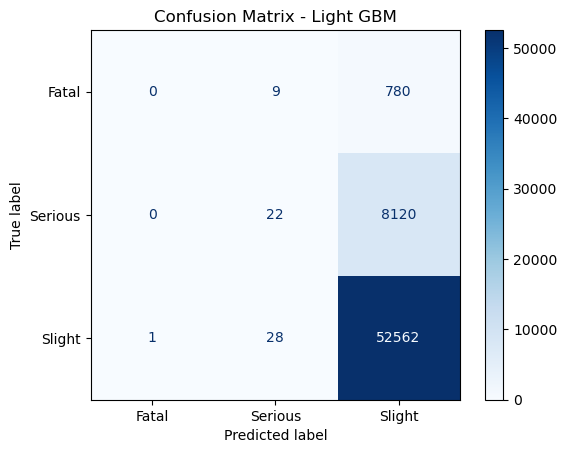

In [784]:
confusionmatrix = confusion_matrix(y_test, ylgbm_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=label_encoder.classes_) 
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Light GBM')
plt.show()

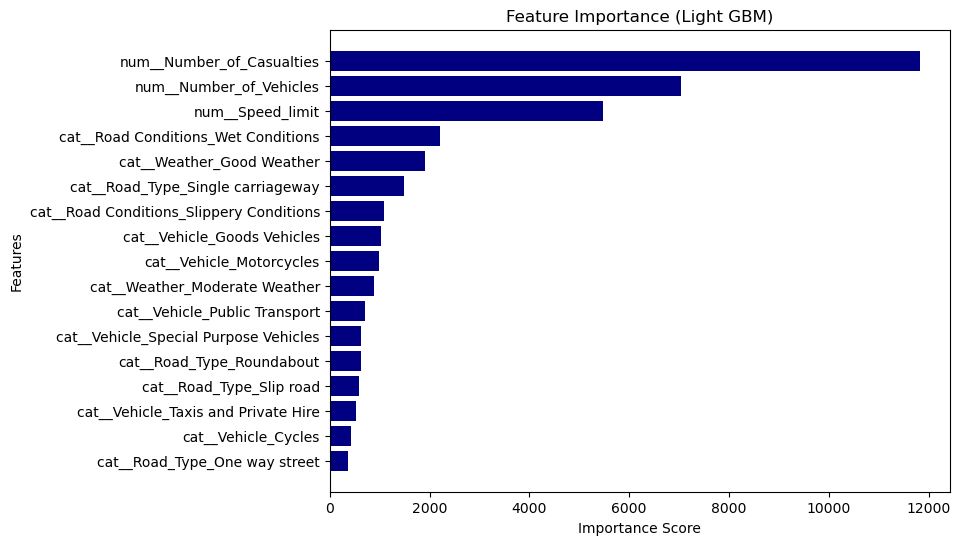

In [856]:
# Feature importance with LGBM
feature_names = preprocessor.get_feature_names_out()
feature_importance = lgbm_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='navy')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Light GBM)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Wanted to use SHAP for feature imporatance but it might not be suitable in this situation and I cannot figure out how to put the names of the features.

In [580]:
explainer = shap.Explainer(lgbm_model, X_test)
shap_values = explainer(X_test)

100%|===================| 184551/184566 [73:13<00:00]        

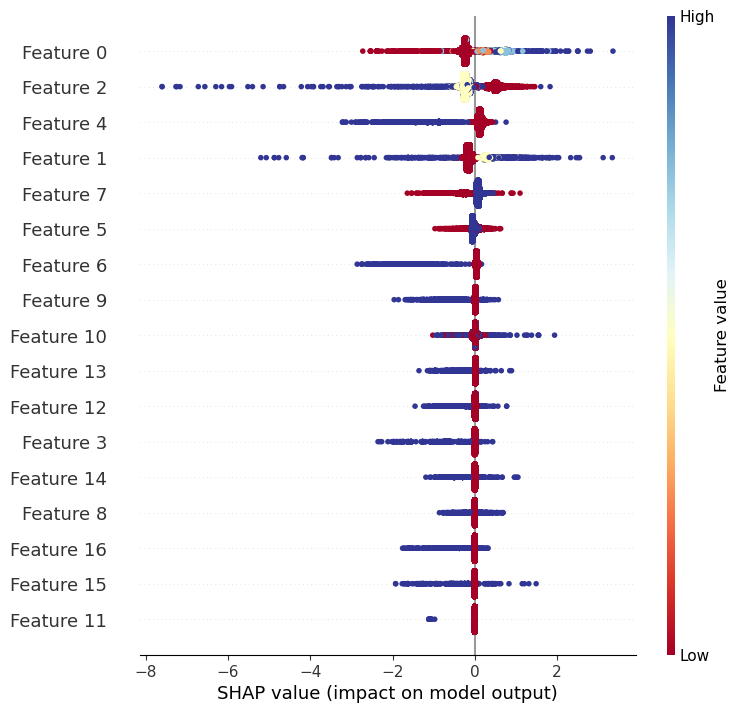

In [845]:
shap_values_single = shap_values[:, :, 0] # Each number represent a class
shap.plots.beeswarm(shap_values_single, max_display=20, color=plt.get_cmap("RdYlBu"))

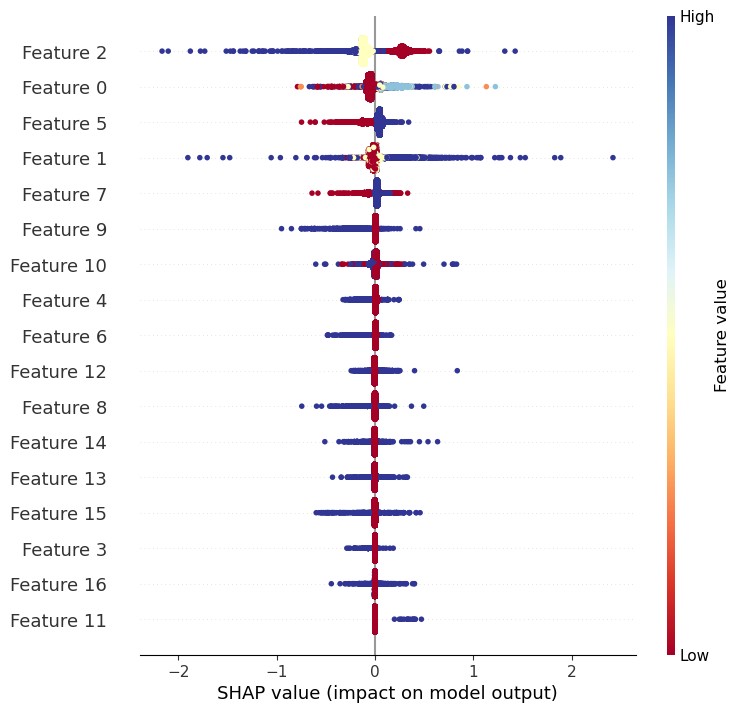

In [638]:
shap_values_single = shap_values[:, :, 1]  
shap.plots.beeswarm(shap_values_single, max_display=20, color=plt.get_cmap("RdYlBu"))

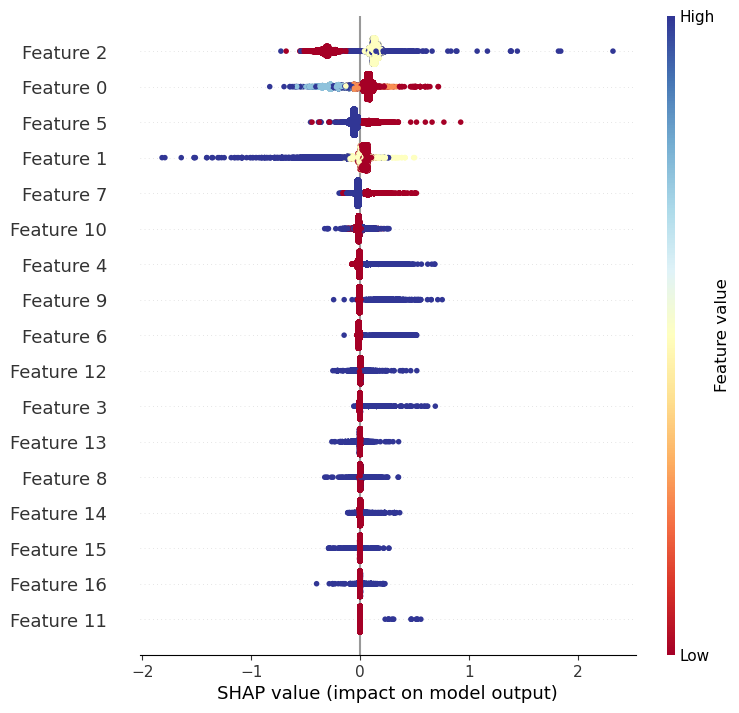

In [639]:
shap_values_single = shap_values[:, :, 2]  
shap.plots.beeswarm(shap_values_single, max_display=20, color=plt.get_cmap("RdYlBu") )

In [525]:
roc_auc_lr = roc_auc_score(y_test, logmodel.predict_proba(X_test), multi_class='ovr')
roc_auc_rf = roc_auc_score(yrf_test, rfmodel.predict_proba(X_test), multi_class='ovr')
roc_auc_lgbm = roc_auc_score(ylgbm_test, lgbm_model.predict_proba(X_test), multi_class='ovr')
print(f"LR ROC-AUC: {roc_auc_lr}")
print(f"RF ROC-AUC: {roc_auc_rf}")
print(f"LGBM ROC-AUC: {roc_auc_lgbm}")

LR ROC-AUC: 0.6526523134278671
RF ROC-AUC: 0.6415719160576224
LGBM ROC-AUC: 0.6754222627311198


### L-GBM Using Hyperparameters tuned from Grid Search

In [853]:
best_lgbm_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 500,
    'num_leaves': 50,
    'random_state': 42
}

lgbm_model = LGBMClassifier(**best_lgbm_params)
lgbm_cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=cv, scoring='accuracy')
lgbm_model.fit(X_train, y_train)
ylgbm_pred = lgbm_model.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, ylgbm_pred)
precision_lgbm = precision_score(y_test, ylgbm_pred, average='weighted', zero_division=0)
recall_lgbm = recall_score(y_test, ylgbm_pred, average='weighted', zero_division=0)
f1_lgbm = f1_score(y_test, ylgbm_pred, average='weighted', zero_division=0)

print(f"Cross-validation Accuracy: {lgbm_cv_scores.mean()}")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1-Score: {f1_lgbm}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 221475, number of used features: 17
[LightGBM] [Info] Start training from score -4.356154
[LightGBM] [Info] Start training from score -2.022313
[LightGBM] [Info] Start training from score -0.156860
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

## SMOTE
Will apply SMOTE only to training data, test data will remain untouched to simulate real world scenarios and we will use standardises variables for all models for a fairer comparison and simplify the code.

In [535]:
numerical_features = ['Speed_limit', 'Number_of_Casualties', 'Number_of_Vehicles']
categorical_features = ['Road_Type', 'Weather', 'Road Conditions', 'Vehicle']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X = dfr[features]
y = dfr[target]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [537]:
# Logistic Regression
logmodel =  LogisticRegression(max_iter=1000, random_state=42)
log_cv_scores = cross_val_score(logmodel, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
logmodel.fit(X_train_smote, y_train_smote)
ylog_pred = logmodel.predict(X_test)

accuracy_log = accuracy_score(y_test, ylog_pred)
precision_log= precision_score(y_test, ylog_pred, average='weighted', zero_division=0) 
recall_log = recall_score(y_test, ylog_pred, average='weighted', zero_division=0)  
f1_log = f1_score(y_test, ylog_pred, average='weighted', zero_division=0)

print(f"Cross-validation Accuracy: {log_cv_scores.mean()}")
print(f"Accuracy: {accuracy_log}")
print(f"Precision: {precision_log}")
print(f"Recall: {recall_log}")
print(f"F1-Score: {f1_log}")

Cross-validation Accuracy: 0.46367145755104755
Accuracy: 0.5337765352231721
Precision: 0.7877708543638411
Recall: 0.5337765352231721
F1-Score: 0.6256417762472701


In [538]:
# Random Forest
rfmodel =  RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rfmodel, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
rfmodel.fit(X_train_smote, y_train_smote)
yrf_pred = rfmodel.predict(X_test)

accuracy_rf = accuracy_score(y_test, yrf_pred)
precision_rf= precision_score(y_test, yrf_pred, average='weighted', zero_division=0) 
recall_rf = recall_score(y_test, yrf_pred, average='weighted', zero_division=0)  
f1_rf = f1_score(y_test, yrf_pred, average='weighted', zero_division=0)

print(f"Cross-validation Accuracy: {rf_cv_scores.mean()}")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")

Cross-validation Accuracy: 0.5598265871556903
Accuracy: 0.579012385813205
Precision: 0.7917831088199282
Recall: 0.579012385813205
F1-Score: 0.6585205604094486


In [786]:
# Light Gradient Boosting
lgbm_model = LGBMClassifier(random_state=42)
lgbm_cv_scores = cross_val_score(lgbm_model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
lgbm_model.fit(X_train_smote, y_train_smote)
ylgbm_pred = lgbm_model.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, ylgbm_pred)
precision_lgbm = precision_score(y_test, ylgbm_pred, average='weighted', zero_division=0) 
recall_lgbm = recall_score(y_test, ylgbm_pred, average='weighted', zero_division=0)  
f1_lgbm = f1_score(y_test, ylgbm_pred, average='weighted', zero_division=0)

print(f"Cross-validation Accuracy: {lgbm_cv_scores.mean()}")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1-Score: {f1_lgbm}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4084
[LightGBM] [Info] Number of data points in the train set: 567966, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4082
[LightGBM] [Info] Number of data points in the train set: 567966, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Star

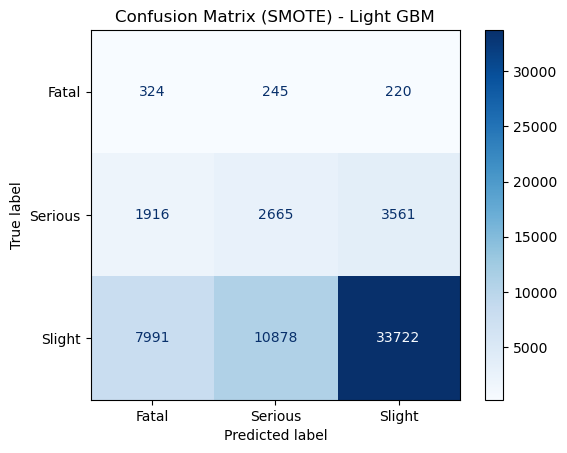

In [787]:
confusionmatrix = confusion_matrix(y_test, ylgbm_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=label_encoder.classes_)  # Use target classes
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (SMOTE) - Light GBM")
plt.savefig('Confusion Matrix LGBM SMOTE.jpg')
plt.show()

### Grid Search
Optimising the hyperparameters for LGBM

In [872]:
from sklearn.model_selection import GridSearchCV
# Inputting hyperparameters for combinations testing
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 50]
}

lgbm = LGBMClassifier(random_state=42)

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, 
                           cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 631074, number of used features: 17
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos